<a href="https://colab.research.google.com/github/thimotyb/real-world-machine-learning/blob/python3/pandas_advanced_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas - Advanced Techniques

This lesson is taken and _optimized_ from the following web sources:

1.   https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086
2.   https://colab.research.google.com/github/thimotyb/real-world-machine-learning/blob/python3/Importing_data_with_pandas.ipynb
3.   https://nvie.com/posts/iterators-vs-generators/
4.   https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
5.   https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html







## Data Types

let’s quickly summarize all the available Pandas data types. In total, there are seven types:
* object : This data type is used for strings (i.e., sequences of characters)
* int64 : Used for integers (whole numbers, no decimals)
* float64 : Used for floating-point numbers (i.e., figures with decimals/fractions)
* bool : Used for values that can only be True/False
* datetime64 : Used for date and time values
* timedelta : Used to represent the difference between datetimes
* category : Used for values that take one out of a limited number of available options (categories don’t have to, but can have explicit ordering)

In [ ]:
num1 = pd.Series((1, 3, 5.0, 4.7))

NameError: ignored

In [ ]:
type(num1)

NameError: ignored

In [ ]:
num1

NameError: ignored

In [ ]:
df = pd.DataFrame(num1)

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df[0]

0      1
1      3
2      5
3    ert
Name: 0, dtype: object

In [ ]:
import pandas as pd
import numpy as np
import datetime
import pytz
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/happiness_with_continent.csv')

In [5]:
invoices = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/invoices.csv')

In [ ]:
invoices.tail(5)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
50012,4OMS8ZSA0UX8LHWI,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 08:00:00+02:00,['Regina Shirley'],9.0,Breakfast,False
50013,RR0VKJN8V0KHNKGG,2018-03-19,22EX9VZSJKHP4AIP,E4K99D4JR9E40VE1,2018-03-18 09:00:00+01:00,['Robin Ramos' 'Chester Mortimer'],25.0,Breakfast,False
50014,STJ6QJC30WPRM93H,2017-09-21,LMX18PNGWCIMG1QW,E4K99D4JR9E40VE1,2017-09-22 21:00:00+02:00,['Robin Ramos'],160.0,Dinner,False
50015,QHEUIYNC0XQX7GDR,2018-01-28,4U0VH2TGQL30X23X,E4K99D4JR9E40VE1,2018-02-01 21:00:00+01:00,['Chester Mortimer' 'Robin Ramos'],497.0,Dinner,False
50016,NKHFWT5I2J9LPAPG,2017-09-06,ORWFRT5TUSYGNYG7,E4K99D4JR9E40VE1,2017-09-09 14:00:00+02:00,['Chester Mortimer' 'Robin Ramos'],365.0,Lunch,False


In [ ]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Id           50017 non-null  object 
 1   Date               50017 non-null  object 
 2   Meal Id            50017 non-null  object 
 3   Company Id         50017 non-null  object 
 4   Date of Meal       50017 non-null  object 
 5   Participants       50017 non-null  object 
 6   Meal Price         50017 non-null  float64
 7   Type of Meal       50017 non-null  object 
 8   Heroes Adjustment  50017 non-null  bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 3.1+ MB


In [ ]:
invoices['Type of Meal'].unique()

array(['Breakfast', 'Dinner', 'Lunch'], dtype=object)

In [ ]:
invoices['Type of Meal'] = invoices['Type of Meal'].astype('category')
invoices['Date'] = invoices['Date'].astype('datetime64[ns]')
invoices['Meal Price'] = invoices['Meal Price'].astype('int')

In [ ]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Id           50017 non-null  object        
 1   Date               50017 non-null  datetime64[ns]
 2   Meal Id            50017 non-null  object        
 3   Company Id         50017 non-null  object        
 4   Date of Meal       50017 non-null  object        
 5   Participants       50017 non-null  object        
 6   Meal Price         50017 non-null  int64         
 7   Type of Meal       50017 non-null  category      
 8   Heroes Adjustment  50017 non-null  bool          
dtypes: bool(1), category(1), datetime64[ns](1), int64(1), object(5)
memory usage: 2.8+ MB


With conversion helpers,  it is possible to specify the behavior in case a value is encountered, that can not be converted.
Both functions accept an additional parameter errors that defines how errors should be treated. We could choose to ignore errors by passingerrors='ignore' , or turn the offending values into np.nan values by passing errors='coerce'. The default behavior is to raise errors.

We create an error and we demonstrate how to handle conversion errors.

In [ ]:
invoices.loc[45612,'Meal Price'] = 'I am causing trouble'
invoices.loc[35612,'Meal Price'] = 'Me too'

In [ ]:
invoices['Meal Price'].astype(int)

ValueError: ignored

In [ ]:
def gigetto(k=2):
  return k*2

In [ ]:
gigetto()

4

In [ ]:
ninetta = gigetto

In [ ]:
ninetta(8)

16

In [ ]:
miosimbolo = lambda x=2: x+2 

In [ ]:
print(miosimbolo(15))

17


In [ ]:
print(lambda x=2: x+3)

<function <lambda> at 0x7efdb949ae60>


In [ ]:
type(25.2)

float

In [ ]:
invoices['Meal Price'].apply(ninetta)

0         938
1          44
2         628
3         876
4        1380
         ... 
50012      18
50013      50
50014     320
50015     994
50016     730
Name: Meal Price, Length: 50017, dtype: object

In [ ]:
invoices['Meal Price'].apply(lambda x: type(x))

0        <class 'int'>
1        <class 'int'>
2        <class 'int'>
3        <class 'int'>
4        <class 'int'>
             ...      
50012    <class 'int'>
50013    <class 'int'>
50014    <class 'int'>
50015    <class 'int'>
50016    <class 'int'>
Name: Meal Price, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].value_counts()

Dinner       16732
Breakfast    16663
Lunch        16622
Name: Type of Meal, dtype: int64

In [ ]:
invoices['Meal Price'].apply(lambda x: type(x)).value_counts()

<class 'int'>    50015
<class 'str'>        2
Name: Meal Price, dtype: int64

In [ ]:
# Now this will not work as part is int and part str
invoices['Meal Price'][invoices['Meal Price']<10]

TypeError: ignored

In [ ]:
df=pd.DataFrame(num1)
df

,0
0,1.0
1,3.0
2,5.0
3,4.7


In [ ]:
df[ [ False, True, False, True ] ]

,0
1,3.0
3,4.7


In [ ]:
df[ (df[0]>1.0) & (df[0]<5) ]

,0
1,3.0
3,4.7


In [ ]:
invoices['Meal Price'].apply(
  lambda x: isinstance(x,str)
)

0        False
1        False
2        False
3        False
4        False
         ...  
50012    False
50013    False
50014    False
50015    False
50016    False
Name: Meal Price, Length: 50017, dtype: bool

In [ ]:
# Conditionally filter by lambda condition
invoices['Meal Price'][invoices['Meal Price'].apply(
  lambda x: isinstance(x,str)
)]

35612                  Me too
45612    I am causing trouble
Name: Meal Price, dtype: object

it would be very reasonable to just convert the values into np.nan by passing errors='coerce' to pd.to_numeric() like this:

In [ ]:
pd.to_numeric(invoices['Meal Price'],errors='coerce')

0        469.0
1         22.0
2        314.0
3        438.0
4        690.0
         ...  
50012      9.0
50013     25.0
50014    160.0
50015    497.0
50016    365.0
Name: Meal Price, Length: 50017, dtype: float64

In [ ]:
invoices.iloc[45612]

Order Id                      SJA1F92KXWZDH398
Date                       2017-02-26 00:00:00
Meal Id                       OOW0UEXQY5RMPPZ8
Company Id                    ICNGUMLKEB27T1P3
Date of Meal         2017-03-02 20:00:00+01:00
Participants                  ['Betty Stroud']
Meal Price                I am causing trouble
Type of Meal                            Dinner
Heroes Adjustment                        False
Name: 45612, dtype: object

In [ ]:
pd.to_numeric(invoices['Meal Price'],errors='coerce')[45612]

nan

In [ ]:
invoices['Meal Price'] = pd.to_numeric(invoices['Meal Price'],errors='coerce')

In [ ]:
invoices.iloc[45612]

Order Id                      SJA1F92KXWZDH398
Date                       2017-02-26 00:00:00
Meal Id                       OOW0UEXQY5RMPPZ8
Company Id                    ICNGUMLKEB27T1P3
Date of Meal         2017-03-02 20:00:00+01:00
Participants                  ['Betty Stroud']
Meal Price                                 NaN
Type of Meal                            Dinner
Heroes Adjustment                        False
Name: 45612, dtype: object

In [ ]:
invoices['Meal Price'] = invoices['Meal Price'].fillna(invoices['Meal Price'].median())

In [ ]:
# Fill in the gaps with fillna and median
invoices['Meal Price'] = pd.to_numeric(invoices['Meal Price'],errors='coerce')
invoices['Meal Price'] = invoices['Meal Price'].fillna(invoices['Meal Price'].median())
invoices['Meal Price'] = invoices['Meal Price'].astype(int)

In [ ]:
print(invoices['Meal Price'].median())
invoices.iloc[45610:45614] # [ ) [ )

398.0


,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
45610,DMB8H3M3WT8GJSPN,2016-08-20,AOJPWQGKNVDF9UD5,ICNGUMLKEB27T1P3,2016-08-17 21:00:00+02:00,['Betty Stroud'],49,Dinner,False
45611,XEEXYOB84AHVCC1J,2018-07-17,63LLVLE72VG2J157,ICNGUMLKEB27T1P3,2018-07-19 20:00:00+02:00,['Alesha Wooten'],891,Dinner,False
45612,SJA1F92KXWZDH398,2017-02-26,OOW0UEXQY5RMPPZ8,ICNGUMLKEB27T1P3,2017-03-02 20:00:00+01:00,['Betty Stroud'],398,Dinner,False
45613,HC6MTWMXF99YEB92,2018-03-01,II205DMW5FBPTGIX,ICNGUMLKEB27T1P3,2018-03-02 13:00:00+01:00,['Betty Stroud'],245,Lunch,False


## Manipulating Date and Time in Pandas

A tutorial on basic python date time standard lib is here:
https://colab.research.google.com/github/thimotyb/materials/blob/master/datetime/datetime_tutorial.ipynb


pd.to_datetime()
Does what the name implies, the method converts a string into a datetime format. To call to_datetime on a column you would do: 
pd.to_datetime(invoices['Date of Meal']). 

Pandas will then guess the format and try to parse the date from the Input. And it does so impressively well:




In [2]:
import pandas as pd

In [ ]:
print(pd.to_datetime('2019-8-1'))
print(pd.to_datetime('2019/8/1'))
print(pd.to_datetime('8/1/2019'))
print(pd.to_datetime('Aug, 1 2019'))
print(pd.to_datetime('Aug - 1 2019'))
print(pd.to_datetime('August - 1 2019'))
print(pd.to_datetime('2019, August - 1'))
print(pd.to_datetime('20190801'))

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00


In [3]:
# With an arbitrary format
print(pd.to_datetime('pippolotto 20190108',format='%Y%d%m', exact=False))

2019-08-01 00:00:00


In [6]:
invoices['Date of Meal'] = pd.to_datetime(invoices['Date of Meal'],utc=True)

In [7]:
invoices['Date of Meal']

0       2016-05-31 05:00:00+00:00
1       2018-10-01 18:00:00+00:00
2       2014-08-23 12:00:00+00:00
3       2014-04-07 19:00:00+00:00
4       2015-07-27 12:00:00+00:00
                   ...           
50012   2017-09-21 06:00:00+00:00
50013   2018-03-18 08:00:00+00:00
50014   2017-09-22 19:00:00+00:00
50015   2018-02-01 20:00:00+00:00
50016   2017-09-09 12:00:00+00:00
Name: Date of Meal, Length: 50017, dtype: datetime64[ns, UTC]

Examples taken from:
https://github.com/pandas-dev/pandas/blob/master/doc/source/user_guide/timeseries.rst

pandas captures 4 general time related concepts:

* Date times: A specific date and time with timezone support. Similar to datetime.datetime from the standard library.
* Time deltas: An absolute time duration. Similar to datetime.timedelta from the standard library.
* Time spans: A span of time defined by a point in time and its associated frequency.
* Date offsets: A relative time duration that respects calendar arithmetic. Similar to dateutil.relativedelta.relativedelta from the dateutil package.

In [8]:
# Generate fixed time series
dti = pd.date_range("2018-01-01", periods=3, freq="H")
dti

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
list(range(len(idx)))

[0, 1, 2, 3, 4]

In [9]:
idx = pd.date_range("2018-01-01", periods=5, freq="H")
ts = pd.Series(range(len(idx)), index=idx)
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [ ]:
ts.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [10]:
friday = pd.Timestamp("2018-01-05")
print(type(friday))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [13]:
friday.day_name()

'Friday'

In [16]:
# Date and Time arithmetics
friday = pd.Timestamp("2018-01-05")
print(friday.day_name())
# Add 1 day
saturday = friday + pd.Timedelta("1 day")
print(saturday.day_name())
# Add 1 business day (Friday --> Monday)
monday = friday + pd.offsets.BDay(1) # Defaults to 1
print(monday.day_name())

Friday
Saturday
Monday


In [18]:
other_time = friday + pd.Timedelta("31 days 600 seconds")

In [19]:
print(other_time)

2018-02-05 00:10:00


In [21]:
import numpy as np
# Timestamps and Periods
dates = [
       pd.Timestamp("2012-01-01"),
       pd.Timestamp("2012-02-01"),
       pd.Timestamp("2012-03-01"),
]
ts = pd.Series(np.random.randn(3), dates)

print(type(ts.index))
print(ts.index)

print(ts)

periods = [pd.Period("2012-01"), pd.Period("2012-02"), pd.Period("2012-03")]

ts = pd.Series(np.random.randn(3), periods)

print(type(ts.index))
print(ts.index)

print(ts)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01'], dtype='datetime64[ns]', freq=None)
2012-01-01    0.045202
2012-02-01    0.576489
2012-03-01    0.188879
dtype: float64
<class 'pandas.core.indexes.period.PeriodIndex'>
PeriodIndex(['2012-01', '2012-02', '2012-03'], dtype='period[M]', freq='M')
2012-01    1.061657
2012-02   -0.425358
2012-03   -0.623295
Freq: M, dtype: float64


In [23]:
import datetime
# Using ranges as indexes (more compact)
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2012, 1, 1)

index = pd.date_range(start, end)
print(index)

index = pd.bdate_range(start, end)
print(index)


DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-12-23', '2011-12-24', '2011-12-25', '2011-12-26',
               '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30',
               '2011-12-31', '2012-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')
DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2011-12-19', '2011-12-20', '2011-12-21', '2011-12-22',
               '2011-12-23', '2011-12-26', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=260, freq='B')


In [ ]:
pd.date_range(start, periods=1000, freq="BMS")

DatetimeIndex(['2011-01-03', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-02', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-03',
               ...
               '2093-07-01', '2093-08-03', '2093-09-01', '2093-10-01',
               '2093-11-02', '2093-12-01', '2094-01-01', '2094-02-01',
               '2094-03-01', '2094-04-01'],
              dtype='datetime64[ns]', length=1000, freq='BMS')

In [25]:
pd.bdate_range(start, periods=250, freq="BQS-FEB") # Business Quarter Start frequency

DatetimeIndex(['2011-02-01', '2011-05-02', '2011-08-01', '2011-11-01',
               '2012-02-01', '2012-05-01', '2012-08-01', '2012-11-01',
               '2013-02-01', '2013-05-01',
               ...
               '2071-02-02', '2071-05-01', '2071-08-03', '2071-11-02',
               '2072-02-01', '2072-05-02', '2072-08-01', '2072-11-01',
               '2073-02-01', '2073-05-01'],
              dtype='datetime64[ns]', length=250, freq='BQS-FEB')

In [27]:
# Custom calendars (holidays) and ranges
weekmask = "Mon Wed Fri"

holidays = [datetime.datetime(2011, 1, 5), datetime.datetime(2011, 3, 14)]

pd.bdate_range(start, end, freq="C", weekmask=weekmask, holidays=holidays)
# Jan 5 2011 not listed because it is a custom holiday

DatetimeIndex(['2011-01-03', '2011-01-07', '2011-01-10', '2011-01-12',
               '2011-01-14', '2011-01-17', '2011-01-19', '2011-01-21',
               '2011-01-24', '2011-01-26',
               ...
               '2011-12-09', '2011-12-12', '2011-12-14', '2011-12-16',
               '2011-12-19', '2011-12-21', '2011-12-23', '2011-12-26',
               '2011-12-28', '2011-12-30'],
              dtype='datetime64[ns]', length=154, freq='C')

In [ ]:
# Creating a calendar class
from pandas.tseries.holiday import (
        Holiday,
        USMemorialDay,
        AbstractHolidayCalendar,
        nearest_workday,
        Easter,
        Day,
)

class ExampleCalendar(AbstractHolidayCalendar):
    rules = [
        USMemorialDay,
        Holiday("July 4th", month=7, day=4, observance=nearest_workday),
        # Easter on 2021 was Apr, 4th, good monday is one day later
        Holiday('Good Monday', month=1, day=1, offset=[Easter(), Day()]),
    ]

cal = ExampleCalendar()
# List the holidays on this calendar
cal.holidays(datetime.datetime(2021, 1, 1), datetime.datetime(2025, 12, 31))

DatetimeIndex(['2021-04-05', '2021-05-31', '2021-07-05', '2022-04-18',
               '2022-05-30', '2022-07-04', '2023-04-10', '2023-05-29',
               '2023-07-04', '2024-04-01', '2024-05-27', '2024-07-04',
               '2025-04-21', '2025-05-26', '2025-07-04'],
              dtype='datetime64[ns]', freq=None)

In [28]:
# Using Trading Calendars
# https://pypi.org/project/trading-calendars/

!pip install trading-calendars

     |████████████████████████████████| 108 kB 1.5 MB/s 
  Created wheel for trading-calendars: filename=trading_calendars-2.1.1-py3-none-any.whl size=140937 sha256=7ec57d4971fd7af76b6975b1d6cf81a126ae6a07366410e80aa9adb8fa363ac7
  Stored in directory: /root/.cache/pip/wheels/62/9c/d1/46a21e1b99e064cba79b85e9f95e6a208ac5ba4c29ae5962ec
Successfully built trading-calendars


In [29]:
import trading_calendars as tc
import pandas as pd
import pytz

tc.get_calendar_names()[:5]


['HKEX', 'XBOM', 'SIX', 'XHEL', 'XKAR']

In [30]:
len(tc.get_calendar_names())

77

In [31]:
xnys = tc.get_calendar("XNYS")

In [32]:
xnys.is_session(pd.Timestamp("2020-01-01"))

False

In [33]:
xnys.next_open(pd.Timestamp("2020-01-01"))

Timestamp('2020-01-02 14:31:00+0000', tz='UTC')

In [34]:
xnys.previous_close(pd.Timestamp("2020-01-01"))

Timestamp('2019-12-31 21:00:00+0000', tz='UTC')

In [35]:
# Get sessions for the specific market in range
>>> xnys.sessions_in_range(
>>>     pd.Timestamp("2020-01-01", tz=pytz.UTC),
>>>     pd.Timestamp("2020-01-10", tz=pytz.UTC)
>>> )

DatetimeIndex(['2020-01-02 00:00:00+00:00', '2020-01-03 00:00:00+00:00',
               '2020-01-06 00:00:00+00:00', '2020-01-07 00:00:00+00:00',
               '2020-01-08 00:00:00+00:00', '2020-01-09 00:00:00+00:00',
               '2020-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='C')

In [63]:
ts = pd.Series(range(len(rng)), index=rng)
ts

2012-01-01    0
2012-01-02    1
2012-01-03    2
2012-01-04    3
2012-01-05    4
2012-01-06    5
2012-01-07    6
2012-01-08    7
2012-01-09    8
2012-01-10    9
Freq: D, dtype: int64

In [58]:
ts2 = ts[:5]

In [62]:
ts.shift(-2)

2012-01-01    2.0
2012-01-02    3.0
2012-01-03    4.0
2012-01-04    5.0
2012-01-05    6.0
2012-01-06    7.0
2012-01-07    8.0
2012-01-08    9.0
2012-01-09    NaN
2012-01-10    NaN
Freq: D, dtype: float64

In [39]:
# Shifting and lagging, slicing on time
import pandas as pd
import numpy as np
rng = pd.date_range("2012-01-01", "2012-01-10")
ts = pd.Series(range(len(rng)), index=rng)
ts = ts[:5]
ts.shift(1)

2012-01-01    NaN
2012-01-02    0.0
2012-01-03    1.0
2012-01-04    2.0
2012-01-05    3.0
Freq: D, dtype: float64

In [40]:
ts.shift(-1)

2012-01-01    1.0
2012-01-02    2.0
2012-01-03    3.0
2012-01-04    4.0
2012-01-05    NaN
Freq: D, dtype: float64

In [64]:
# shift 5 months at business end
# When freq is specified, shift method changes all the dates in the index rather than changing the alignment of the data and the index:
ts.shift(1, freq="D")

2012-01-02    0
2012-01-03    1
2012-01-04    2
2012-01-05    3
2012-01-06    4
2012-01-07    5
2012-01-08    6
2012-01-09    7
2012-01-10    8
2012-01-11    9
Freq: D, dtype: int64

In [65]:
ts.shift(1, freq="B")

2012-01-02    0
2012-01-03    1
2012-01-04    2
2012-01-05    3
2012-01-06    4
2012-01-09    5
2012-01-09    6
2012-01-09    7
2012-01-10    8
2012-01-11    9
dtype: int64

In [68]:
# Frequency conversion
pd.set_option('display.max_rows', 10) # to print all 10 instances after freq conversion
print(pd.Timestamp("1/1/2010").day_name())
dr = pd.date_range("1/1/2010", periods=3, freq=3 * pd.offsets.BDay())
ts = pd.Series(np.random.randn(3), index=dr)
print(ts)
print('---')
print(ts.asfreq(pd.offsets.BDay()))

Friday
2010-01-01    2.559017
2010-01-06    0.882576
2010-01-11    0.320707
Freq: 3B, dtype: float64
---
2010-01-01    2.559017
2010-01-04         NaN
2010-01-05         NaN
2010-01-06    0.882576
2010-01-07         NaN
2010-01-08         NaN
2010-01-11    0.320707
Freq: B, dtype: float64


In [70]:
# With interpolation method
ts.asfreq(pd.offsets.BDay(), method="bfill")

2010-01-01    2.559017
2010-01-04    0.882576
2010-01-05    0.882576
2010-01-06    0.882576
2010-01-07    0.320707
2010-01-08    0.320707
2010-01-11    0.320707
Freq: B, dtype: float64

In [72]:
# Example of linear interpolation
dr = pd.date_range("1/1/2010", periods=3, freq=3 * pd.offsets.BDay())
ts2 = pd.Series(np.random.randn(3), index=dr)
ts2 = ts2.asfreq(pd.offsets.BDay())
print(ts2)
print("---")
print(ts2.interpolate(method="linear"))

2010-01-01    0.047794
2010-01-04         NaN
2010-01-05         NaN
2010-01-06    0.979854
2010-01-07         NaN
2010-01-08         NaN
2010-01-11    0.025197
Freq: B, dtype: float64
---
2010-01-01    0.047794
2010-01-04    0.358481
2010-01-05    0.669168
2010-01-06    0.979854
2010-01-07    0.661635
2010-01-08    0.343416
2010-01-11    0.025197
Freq: B, dtype: float64


In [73]:
# Resampling
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
print(ts)
print('---')
print(ts.resample("1Min").sum())

2012-01-01 00:00:00    138
2012-01-01 00:00:01    436
2012-01-01 00:00:02    375
2012-01-01 00:00:03     50
2012-01-01 00:00:04    239
                      ... 
2012-01-01 00:01:35     30
2012-01-01 00:01:36    427
2012-01-01 00:01:37    396
2012-01-01 00:01:38    310
2012-01-01 00:01:39    185
Freq: S, Length: 100, dtype: int64
---
2012-01-01 00:00:00    15779
2012-01-01 00:01:00    10512
Freq: T, dtype: int64


In [74]:
# Different aggregators and labeling
ts.resample("1Min").mean()

2012-01-01 00:00:00    262.983333
2012-01-01 00:01:00    262.800000
Freq: T, dtype: float64

In [77]:
# Open High Low Close
ts.resample("1Min").ohlc()

,open,high,low,close
2012-01-01 00:00:00,138,495,14,186
2012-01-01 00:01:00,266,499,13,185


In [78]:
# Upsampling
# from secondly to every 250 milliseconds
ts[:2].resample("250L").asfreq()
# TODO : How to interpolate?

2012-01-01 00:00:00.000    138.0
2012-01-01 00:00:00.250      NaN
2012-01-01 00:00:00.500      NaN
2012-01-01 00:00:00.750      NaN
2012-01-01 00:00:01.000    436.0
Freq: 250L, dtype: float64

In [ ]:
ts[:2].resample("250L").ffill()

2012-01-01 00:00:00.000    481
2012-01-01 00:00:00.250    481
2012-01-01 00:00:00.500    481
2012-01-01 00:00:00.750    481
2012-01-01 00:00:01.000     21
Freq: 250L, dtype: int64

In [79]:
ts[:2].resample("250L").interpolate(method="linear")

2012-01-01 00:00:00.000    138.0
2012-01-01 00:00:00.250    212.5
2012-01-01 00:00:00.500    287.0
2012-01-01 00:00:00.750    361.5
2012-01-01 00:00:01.000    436.0
Freq: 250L, dtype: float64

In [ ]:
df = pd.DataFrame(ts)

In [ ]:
df["ds"] = df.index

In [ ]:
df["y"] = df[0]
df.reset_index()

,index,0,ds,y
0,2012-01-01 00:00:00,481,2012-01-01 00:00:00,481
1,2012-01-01 00:00:01,21,2012-01-01 00:00:01,21
2,2012-01-01 00:00:02,270,2012-01-01 00:00:02,270
3,2012-01-01 00:00:03,53,2012-01-01 00:00:03,53
4,2012-01-01 00:00:04,346,2012-01-01 00:00:04,346
...,...,...,...,...
95,2012-01-01 00:01:35,193,2012-01-01 00:01:35,193
96,2012-01-01 00:01:36,487,2012-01-01 00:01:36,487
97,2012-01-01 00:01:37,116,2012-01-01 00:01:37,116
98,2012-01-01 00:01:38,479,2012-01-01 00:01:38,479


In [ ]:
df

,0,ds,y
2012-01-01 00:00:00,481,2012-01-01 00:00:00,481
2012-01-01 00:00:01,21,2012-01-01 00:00:01,21
2012-01-01 00:00:02,270,2012-01-01 00:00:02,270
2012-01-01 00:00:03,53,2012-01-01 00:00:03,53
2012-01-01 00:00:04,346,2012-01-01 00:00:04,346
...,...,...,...
2012-01-01 00:01:35,193,2012-01-01 00:01:35,193
2012-01-01 00:01:36,487,2012-01-01 00:01:36,487
2012-01-01 00:01:37,116,2012-01-01 00:01:37,116
2012-01-01 00:01:38,479,2012-01-01 00:01:38,479


In [81]:
!pip install prophet
from prophet import Prophet

     |████████████████████████████████| 65 kB 1.9 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 214 kB 8.5 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639864 sha256=3ff882a5b258807d7038436d12abe37b2c7c67887a56a0f2a3faf17fc22e0bf7
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


In [84]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [87]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.200924,7.447460,8.922015
3266,2017-01-16,8.525932,7.801727,9.314275
3267,2017-01-17,8.313330,7.593463,9.030164
3268,2017-01-18,8.145923,7.392191,8.832528
3269,2017-01-19,8.157831,7.379191,8.872458


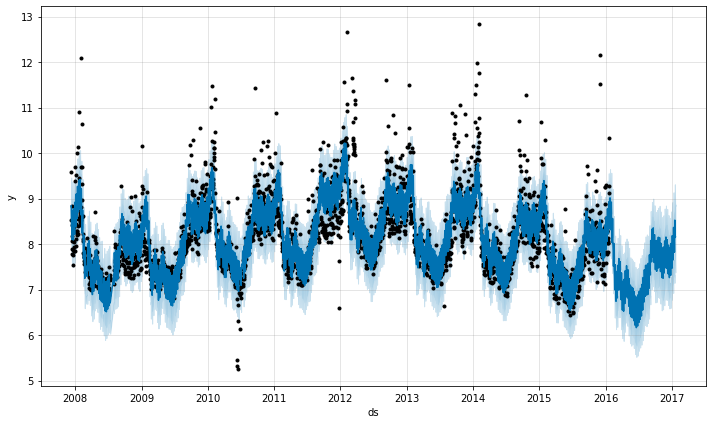

In [88]:
# Python
fig1 = m.plot(forecast)

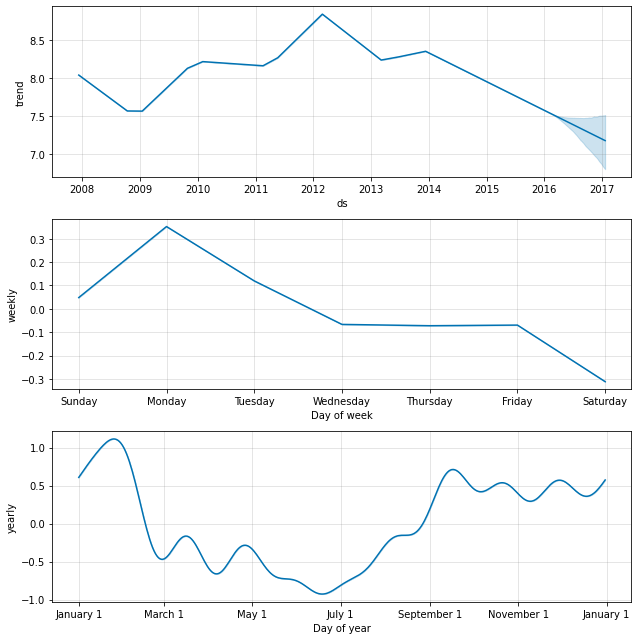

In [90]:
# Python
fig2 = m.plot_components(forecast)

## Accessors

 a property that acts as an interface to methods specific to the type you are trying to access. Those methods are highly specialized. They serve one job and one job only. However, they are excellent and extremely concise for that particular job.
There are three different accessors:
* dt
* str
* cat

In [ ]:
pd.set_option('display.max_rows', 4)

### dt

In [ ]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Order Id           50017 non-null  object             
 1   Date               50017 non-null  datetime64[ns]     
 2   Meal Id            50017 non-null  object             
 3   Company Id         50017 non-null  object             
 4   Date of Meal       50017 non-null  datetime64[ns, UTC]
 5   Participants       50017 non-null  object             
 6   Meal Price         50017 non-null  int64              
 7   Type of Meal       50017 non-null  category           
 8   Heroes Adjustment  50017 non-null  bool               
dtypes: bool(1), category(1), datetime64[ns, UTC](1), datetime64[ns](1), int64(1), object(4)
memory usage: 2.8+ MB


In [ ]:
invoices['Date of Meal'] = pd.to_datetime(invoices['Date of Meal'],utc=True)

In [ ]:
invoices['Date of Meal'].dt.date

0        2016-05-31
1        2018-10-01
2        2014-08-23
3        2014-04-07
4        2015-07-27
            ...    
50012    2017-09-21
50013    2018-03-18
50014    2017-09-22
50015    2018-02-01
50016    2017-09-09
Name: Date of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Date of Meal'].dt.weekday

0        1
1        0
2        5
3        0
4        0
        ..
50012    3
50013    6
50014    4
50015    3
50016    5
Name: Date of Meal, Length: 50017, dtype: int64

In [ ]:
invoices['Date of Meal'].dt.month

0         5
1        10
2         8
3         4
4         7
         ..
50012     9
50013     3
50014     9
50015     2
50016     9
Name: Date of Meal, Length: 50017, dtype: int64

In [ ]:
invoices['Date of Meal'].dt.isocalendar().week

0        22
1        40
2        34
3        15
4        31
         ..
50012    38
50013    11
50014    38
50015     5
50016    36
Name: week, Length: 50017, dtype: UInt32

In [ ]:
invoices['Date of Meal'].dt.is_month_end
# also available: is_leap_year, is_month_start, is_month_end, is_quarter_start, is_quarter_end, is_year_start, is_year_end

0         True
1        False
2        False
3        False
4        False
         ...  
50012    False
50013    False
50014    False
50015    False
50016    False
Name: Date of Meal, Length: 50017, dtype: bool

In [ ]:
invoices[invoices['Date of Meal'].dt.is_month_end]

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469,Breakfast,False
6,2DDN2LHS7G85GKPQ,2014-04-29,1MKLAKBOE3SP7YUL,LJKS5NK6788CYMUU,2014-04-30 19:00:00+00:00,['Susan Guerrero' 'David Bishop'],14,Dinner,False
127,IFWFCKR8TRAGCLSN,2015-09-03,KP72EIIXT3D2D3YX,TAW7IY2L2IKUCCGC,2015-08-31 18:00:00+00:00,['Tina Jones'],385,Dinner,False
199,R5RROQZEHSVU7JWT,2014-06-02,BAZRFTKXVH12H4L0,W2X6NP1JBOKWCO33,2014-05-31 06:00:00+00:00,['Brandon Rivera'],468,Breakfast,False
218,2H7XSZBSVIB592ZV,2014-02-27,ASSDKQPHZMMOZSRH,MR6NETSKD2PSN54L,2014-02-28 20:00:00+00:00,['Rosa Parramore'],206,Dinner,False
...,...,...,...,...,...,...,...,...,...
49760,FRL2QX8BJTP7KZ47,2017-05-30,N5HWG7I3IA4ULSIF,KB2Q9OCU65RXWBNF,2017-05-31 07:00:00+00:00,['Jeffrey Miller' 'Dewey Grant'],603,Breakfast,False
49840,H3JAY96W61R8R4TL,2016-05-29,6LGP15E0XZLBRGHB,2UTFJU7Q3VWNMJ00,2016-05-31 11:00:00+00:00,['Earnestine Mckeeman' 'Sid Brown'],248,Lunch,False
49865,68I4K85G0WR7047R,2014-11-26,4R0TOJ9ENQ65VPE9,3OE3X93CX3TNVHLA,2014-11-30 21:00:00+00:00,['Jeffrey Phillips'],491,Dinner,False
49896,G3FX5EAE2VCUFELA,2016-03-05,SZ1UUTPDNW3FCIFF,CZTLKWWDEHQ0GW0I,2016-02-29 07:00:00+00:00,['Olga Fortenberry'],288,Breakfast,False


In [ ]:
# converts the Pandas datetime into a regular Python datetime format 
invoices['Date of Meal'].dt.to_pydatetime()

array([datetime.datetime(2016, 5, 31, 5, 0, tzinfo=<UTC>),
       datetime.datetime(2018, 10, 1, 18, 0, tzinfo=<UTC>),
       datetime.datetime(2014, 8, 23, 12, 0, tzinfo=<UTC>), ...,
       datetime.datetime(2017, 9, 22, 19, 0, tzinfo=<UTC>),
       datetime.datetime(2018, 2, 1, 20, 0, tzinfo=<UTC>),
       datetime.datetime(2017, 9, 9, 12, 0, tzinfo=<UTC>)], dtype=object)

In [ ]:
# to period [available periods are W, M, Q, and Y], which converts the dates into periods.
invoices['Date of Meal'].dt.to_period('W')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


0        2016-05-30/2016-06-05
1        2018-10-01/2018-10-07
2        2014-08-18/2014-08-24
3        2014-04-07/2014-04-13
4        2015-07-27/2015-08-02
                 ...          
50012    2017-09-18/2017-09-24
50013    2018-03-12/2018-03-18
50014    2017-09-18/2017-09-24
50015    2018-01-29/2018-02-04
50016    2017-09-04/2017-09-10
Name: Date of Meal, Length: 50017, dtype: period[W-SUN]

In [ ]:
invoices['Date of Meal'].dt.to_period('W-MON')

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


0        2016-05-31/2016-06-06
1        2018-09-25/2018-10-01
2        2014-08-19/2014-08-25
3        2014-04-01/2014-04-07
4        2015-07-21/2015-07-27
                 ...          
50012    2017-09-19/2017-09-25
50013    2018-03-13/2018-03-19
50014    2017-09-19/2017-09-25
50015    2018-01-30/2018-02-05
50016    2017-09-05/2017-09-11
Name: Date of Meal, Length: 50017, dtype: period[W-MON]

### str

In [ ]:
pd.set_option('display.max_rows', 10)
invoices['Type of Meal'].str.lower()

0        breakfast
1           dinner
2            lunch
3           dinner
4            lunch
           ...    
50012    breakfast
50013    breakfast
50014       dinner
50015       dinner
50016        lunch
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.rjust(width=15)

0              Breakfast
1                 Dinner
2                  Lunch
3                 Dinner
4                  Lunch
              ...       
50012          Breakfast
50013          Breakfast
50014             Dinner
50015             Dinner
50016              Lunch
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.zfill(width=15)

0        000000Breakfast
1        000000000Dinner
2        0000000000Lunch
3        000000000Dinner
4        0000000000Lunch
              ...       
50012    000000Breakfast
50013    000000Breakfast
50014    000000000Dinner
50015    000000000Dinner
50016    0000000000Lunch
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:

invoices['Type of Meal'].str.repeat(2)

0        BreakfastBreakfast
1              DinnerDinner
2                LunchLunch
3              DinnerDinner
4                LunchLunch
                ...        
50012    BreakfastBreakfast
50013    BreakfastBreakfast
50014          DinnerDinner
50015          DinnerDinner
50016            LunchLunch
Name: Type of Meal, Length: 50017, dtype: object

In [ ]:
invoices['Type of Meal'].str.endswith('ast')

0         True
1        False
2        False
3        False
4        False
         ...  
50012     True
50013     True
50014    False
50015    False
50016    False
Name: Type of Meal, Length: 50017, dtype: bool

In [ ]:
invoices[invoices['Participants'].str.contains('Bruce')]

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
214,PSQXKK7KIDIRKDSG,2018-12-07,GG9MXLE8MGY8VGPD,MR6NETSKD2PSN54L,2018-12-09 06:00:00+00:00,['Jane Bruce'],400,Breakfast,False
215,Z8PYUN4L85MEW5W4,2016-07-26,MG7LI3RM8K3UKR34,MR6NETSKD2PSN54L,2016-07-30 19:00:00+00:00,['Jane Bruce' 'Jennifer Lee' 'Rosa Parramore'],503,Dinner,False
216,8XWFE5AX3D9LX5AY,2017-09-18,99NEQYAVFP9W1IHK,MR6NETSKD2PSN54L,2017-09-22 06:00:00+00:00,['Jane Bruce'],137,Breakfast,False
217,X546I8JFNVJFE7FH,2017-10-01,G2UDNGRTBYGIS90Z,MR6NETSKD2PSN54L,2017-09-26 05:00:00+00:00,['Martin Riley' 'Jane Bruce' 'Rosa Parramore'],409,Breakfast,False
219,GCB5ULGM1W8A8HPR,2017-12-14,XI16TWCYLA0F7NLZ,MR6NETSKD2PSN54L,2017-12-15 08:00:00+00:00,['Earl Sorrentino' 'Jane Bruce'],339,Breakfast,False
...,...,...,...,...,...,...,...,...,...
48761,W7X0DMISLLY4X9I6,2017-08-29,EDVP4TD6YCHF8N00,TXTJD46IGQWLD75D,2017-09-02 05:00:00+00:00,['John Leo' 'Judy Dammann' 'Todd Bradshaw' 'Co...,465,Breakfast,True
48764,K69T43KA9WCW9GOI,2016-06-03,16I4B1HW4T60CO8H,TXTJD46IGQWLD75D,2016-05-29 11:00:00+00:00,['Judy Dammann' 'John Leo' 'Courtney Shaw' 'Br...,112,Lunch,True
48767,66DNKN5WXDS73VUA,2018-05-20,5HLCRT0G3S9D20SQ,TXTJD46IGQWLD75D,2018-05-23 06:00:00+00:00,['Lydia Muske' 'Todd Bradshaw' 'Judy Dammann' ...,898,Breakfast,True
48770,RYN3CZCDK3TQLX5O,2015-08-11,TE9PC2623UV8XL4L,TXTJD46IGQWLD75D,2015-08-11 07:00:00+00:00,['Courtney Shaw' 'Lydia Muske' 'Bruce Duenas' ...,280,Breakfast,True


### *cat*

For categorical operations

In [ ]:
invoices['Type of Meal'].cat.ordered

False

In [ ]:
invoices['Type of Meal'].cat.categories

Index(['Breakfast', 'Dinner', 'Lunch'], dtype='object')

In [ ]:
invoices['Type of Meal'].cat.codes

0        0
1        1
2        2
3        1
4        2
        ..
50012    0
50013    0
50014    1
50015    1
50016    2
Length: 50017, dtype: int8

In [ ]:
# One Hot Encoding
invoices['Type of Meal'].str.get_dummies()

,Breakfast,Dinner,Lunch
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
50012,1,0,0
50013,1,0,0
50014,0,1,0
50015,0,1,0


# Combining Dataframes

## Concat

In [ ]:
# Concatenating
invoices['Date of Meal'].dt.year.value_counts().sort_index()

2013       34
2014    10051
2015    10036
2016     9862
2017     9921
2018    10095
2019       18
Name: Date of Meal, dtype: int64

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html?highlight=dataframe%20copy#pandas.DataFrame.copy

y_2013 = invoices[invoices['Date of Meal'].dt.year == 2013].copy()
y_2014 = invoices[invoices['Date of Meal'].dt.year == 2014].copy()
y_2015 = invoices[invoices['Date of Meal'].dt.year == 2015].copy()
y_2016 = invoices[invoices['Date of Meal'].dt.year == 2016].copy()
y_2017 = invoices[invoices['Date of Meal'].dt.year == 2017].copy()
y_2018 = invoices[invoices['Date of Meal'].dt.year == 2018].copy()
y_2019 = invoices[invoices['Date of Meal'].dt.year == 2019].copy()

In [ ]:
y_2016

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469,Breakfast,False
9,FESGKOQN2OZZWXY3,2016-01-10,US0NQYNNHS1SQJ4S,36MFTZOYMTAJP1RK,2016-01-14 21:00:00+00:00,['Glenn Gould' 'Amanda Knowles' 'Ginger Hoagla...,451,Dinner,False
10,YITOTLOF0MWZ0VYX,2016-10-03,RGYX8772307H78ON,36MFTZOYMTAJP1RK,2016-10-01 20:00:00+00:00,['Ginger Hoagland' 'Amanda Knowles' 'Michael W...,263,Dinner,False
12,TH60C9D8TPYS7DGG,2016-12-15,KDSMP2VJ22HNEPYF,36MFTZOYMTAJP1RK,2016-12-13 07:00:00+00:00,['Cheryl Feaster' 'Bret Adams' 'Ginger Hoagland'],755,Breakfast,False
14,WKB58Q8BHLOFQAB5,2016-08-31,E2K2TQUMENXSI9RP,36MFTZOYMTAJP1RK,2016-09-03 12:00:00+00:00,['Michael White' 'Ginger Hoagland' 'Bret Adams'],502,Lunch,False
...,...,...,...,...,...,...,...,...,...
50003,VC858QHD5EW99MYD,2016-12-25,95XY29BUWLB0UEQR,FC1LJXHNH2883N3Y,2016-12-23 11:00:00+00:00,['Jon Ponce'],45,Lunch,False
50005,WQ9O30HM7Z20CX11,2016-08-26,R3CY4BU2QN5ZVMC0,FC1LJXHNH2883N3Y,2016-08-27 07:00:00+00:00,['Jerry Nelson' 'Alice Allen'],342,Breakfast,False
50008,UHIE76EGIC2KFP34,2016-08-06,BFLY4LHHUI5OIREM,FC1LJXHNH2883N3Y,2016-08-08 06:00:00+00:00,['Jerry Nelson'],164,Breakfast,False
50009,FWH3N8N5ARW53BE6,2016-03-17,WHVI4J3J388I8I4B,FC1LJXHNH2883N3Y,2016-03-12 08:00:00+00:00,['Jon Ponce' 'Alice Allen'],523,Breakfast,False


In [ ]:
pd.concat(
    [y_2013,y_2014,y_2015,y_2016,y_2017,y_2018,y_2019],
    keys=[13,14,15,16,17,18,19],
    names=['year','original_index']
)

Order Id  ... Heroes Adjustment
year original_index                    ...                  
13   1449            HH1CUKNKIIK87D4L  ...             False
     4256            KFXTYDP0YG9C6AZF  ...             False
     4747            D5NR6EP8NQZ0TGW6  ...             False
     5097            2T71YISMHMPBKE3Z  ...             False
     5154            V226RP8DLAQQKU51  ...             False
...                               ...  ...               ...
19   33833           IVSKD45PB8FZ0DRT  ...             False
     35406           IASPC12JU67ANTA5  ...             False
     36958           0GNFQ2XTTI56QE1E  ...             False
     43534           8YHA5UTWAT7BOC24  ...             False
     48207           J5FBQ0JWGIKWFSCO  ...             False

[50017 rows x 9 columns]

In [ ]:
import datetime
# Horizontal stacking
range_a = pd.date_range(
    datetime.datetime(2019,1,2),
    datetime.datetime(2019,1,8)
)
df_a = pd.DataFrame(
    index=range_a, 
    data=np.random.randint(2,10,size=len(range_a)),
    columns=['observations_A']
)

range_b = pd.date_range(
    datetime.datetime(2019,1,5),
    datetime.datetime(2019,1,12)
)

df_b = pd.DataFrame(
    index=range_b, 
    data=np.random.randint(2,10,size=len(range_b)),
    columns=['observations_B']
)

pd.concat([df_a,df_b],axis=1)

,observations_A,observations_B
2019-01-02,6.0,NaN
2019-01-03,7.0,NaN
2019-01-04,4.0,NaN
2019-01-05,8.0,4.0
2019-01-06,2.0,9.0
...,...,...
2019-01-08,5.0,6.0
2019-01-09,NaN,9.0
2019-01-10,NaN,7.0
2019-01-11,NaN,4.0


## Merge

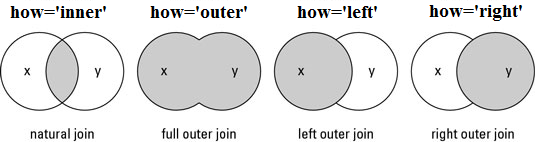

In [ ]:
order_data = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/order_leads.csv',parse_dates=[3])
sales_team = pd.read_csv('https://raw.githubusercontent.com/thimotyb/you-datascientist/master/sales_team.csv')

In [ ]:
invoices.head(3)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 18:00:00+00:00,['David Bishop'],22,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 12:00:00+00:00,['Karen Stansell'],314,Lunch,False


In [ ]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Order Id      100000 non-null  object        
 1   Company Id    100000 non-null  object        
 2   Company Name  100000 non-null  object        
 3   Date          100000 non-null  datetime64[ns]
 4   Order Value   100000 non-null  int64         
 5   Converted     100000 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:

order_data.head(3)

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0


In [ ]:
sales_team.head(3)

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,Jessie Mcallister,97UNNAT790E0WM4N,Chimera-Chasing Casbah,LJKS5NK6788CYMUU
1,Jessie Mcallister,97UNNAT790E0WM4N,Tangential Sheds,36MFTZOYMTAJP1RK
2,Jessie Mcallister,97UNNAT790E0WM4N,Two-Mile Grab,H3JRC7XX7WJAD4ZO


No parameters provided: All parameters will use their defaults.
The merge is going to be an inner merge (equivalent to how='inner').
The merge is going to be done on all common columns, i.e., Date, Order Id, and Company Id(equivalent to on=['Date','Order Id','Company Id]).
Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.

In [ ]:

pd.merge(order_data,invoices)

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469,Breakfast,False
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22,Dinner,False
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185,0,E4UJLQNCI16UX5CS,2014-08-23 12:00:00+00:00,['Karen Stansell'],314,Lunch,False
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839,0,C9SDFHF7553BE247,2014-04-07 19:00:00+00:00,['Addie Patino'],438,Dinner,False
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841,0,48EQXS6IHYNZDDZ5,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690,Lunch,False
...,...,...,...,...,...,...,...,...,...,...,...,...
50012,4OMS8ZSA0UX8LHWI,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-20,110,0,1TD5MROATV1NHZ4Y,2017-09-21 06:00:00+00:00,['Regina Shirley'],9,Breakfast,False
50013,RR0VKJN8V0KHNKGG,E4K99D4JR9E40VE1,Fierce Productivity,2018-03-19,356,0,22EX9VZSJKHP4AIP,2018-03-18 08:00:00+00:00,['Robin Ramos' 'Chester Mortimer'],25,Breakfast,False
50014,STJ6QJC30WPRM93H,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-21,2228,1,LMX18PNGWCIMG1QW,2017-09-22 19:00:00+00:00,['Robin Ramos'],160,Dinner,False
50015,QHEUIYNC0XQX7GDR,E4K99D4JR9E40VE1,Fierce Productivity,2018-01-28,8869,0,4U0VH2TGQL30X23X,2018-02-01 20:00:00+00:00,['Chester Mortimer' 'Robin Ramos'],497,Dinner,False


how='left' : Again, the merge is based on all common columns. Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.
However, this time around, we merge with how='left' which means that we will take all rows from the left frame and only add data from the right frame where we find some.

In [ ]:
pd.merge(order_data,invoices,how='left')

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,NaN,NaT,NaN,NaN,NaN,NaN
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,NaN,NaT,NaN,NaN,NaN,NaN
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4MFHIAQKH0HCACJM,E4K99D4JR9E40VE1,Fierce Productivity,2015-07-25,4851,0,NaN,NaT,NaN,NaN,NaN,NaN
99996,K1UP23P8SIY1YION,E4K99D4JR9E40VE1,Fierce Productivity,2015-08-24,7868,0,NaN,NaT,NaN,NaN,NaN,NaN
99997,NKHFWT5I2J9LPAPG,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-06,5138,0,ORWFRT5TUSYGNYG7,2017-09-09 12:00:00+00:00,['Chester Mortimer' 'Robin Ramos'],365.0,Lunch,False
99998,OF79M3H9C44UM6PO,E4K99D4JR9E40VE1,Fierce Productivity,2015-10-29,2036,0,NaN,NaT,NaN,NaN,NaN,NaN


how='right' : Again, the merge is based on all common columns. Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.
However, this time around, we merge with how='right' which means that we will take all rows from the right frame and only add data from the left frame where we find some. This case is equivalent to 'inner' in our example as every row in the left DataFrame has a corresponding row in the right DataFrame.

In [ ]:
pd.merge(order_data,invoices,how='right')

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469,Breakfast,False
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22,Dinner,False
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185,0,E4UJLQNCI16UX5CS,2014-08-23 12:00:00+00:00,['Karen Stansell'],314,Lunch,False
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839,0,C9SDFHF7553BE247,2014-04-07 19:00:00+00:00,['Addie Patino'],438,Dinner,False
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841,0,48EQXS6IHYNZDDZ5,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690,Lunch,False
...,...,...,...,...,...,...,...,...,...,...,...,...
50012,4OMS8ZSA0UX8LHWI,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-20,110,0,1TD5MROATV1NHZ4Y,2017-09-21 06:00:00+00:00,['Regina Shirley'],9,Breakfast,False
50013,RR0VKJN8V0KHNKGG,E4K99D4JR9E40VE1,Fierce Productivity,2018-03-19,356,0,22EX9VZSJKHP4AIP,2018-03-18 08:00:00+00:00,['Robin Ramos' 'Chester Mortimer'],25,Breakfast,False
50014,STJ6QJC30WPRM93H,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-21,2228,1,LMX18PNGWCIMG1QW,2017-09-22 19:00:00+00:00,['Robin Ramos'],160,Dinner,False
50015,QHEUIYNC0XQX7GDR,E4K99D4JR9E40VE1,Fierce Productivity,2018-01-28,8869,0,4U0VH2TGQL30X23X,2018-02-01 20:00:00+00:00,['Chester Mortimer' 'Robin Ramos'],497,Dinner,False


how='outer' : Again, the merge is based on all common columns. Suffixes are not relevant as all common columns will be used to merge on, so there will no be duplicated columns remaining.
However, this time around, we merge with how='outer'. We take all rows from either, the left or the right DataFrame and add corresponding data where we find some in the other DataFrame. This case is equivalent to 'left' in our example as every row in the left DataFrame has a corresponding row in the right DataFrame.

In [ ]:
pd.merge(order_data,invoices,how='outer')

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Meal Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,NaN,NaT,NaN,NaN,NaN,NaN
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,NaN,NaT,NaN,NaN,NaN,NaN
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,INBUX904GIHI8YBD,2016-05-31 05:00:00+00:00,['David Bishop'],469.0,Breakfast,False
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,J0MMOOPP709DIDIE,2018-10-01 18:00:00+00:00,['David Bishop'],22.0,Dinner,False
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4MFHIAQKH0HCACJM,E4K99D4JR9E40VE1,Fierce Productivity,2015-07-25,4851,0,NaN,NaT,NaN,NaN,NaN,NaN
99996,K1UP23P8SIY1YION,E4K99D4JR9E40VE1,Fierce Productivity,2015-08-24,7868,0,NaN,NaT,NaN,NaN,NaN,NaN
99997,NKHFWT5I2J9LPAPG,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-06,5138,0,ORWFRT5TUSYGNYG7,2017-09-09 12:00:00+00:00,['Chester Mortimer' 'Robin Ramos'],365.0,Lunch,False
99998,OF79M3H9C44UM6PO,E4K99D4JR9E40VE1,Fierce Productivity,2015-10-29,2036,0,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
pd.merge(order_data,invoices,on='Order Id',suffixes=('_base','_join'))

,Order Id,Company Id_base,Company Name,Date_base,Order Value,Converted,Date_join,Meal Id,Company Id_join,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 05:00:00+00:00,['David Bishop'],469,Breakfast,False
1,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 18:00:00+00:00,['David Bishop'],22,Dinner,False
2,041ORQM5OIHTIU6L,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-08-24,4185,0,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 12:00:00+00:00,['Karen Stansell'],314,Lunch,False
3,YT796QI18WNGZ7ZJ,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2014-04-12,5839,0,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 19:00:00+00:00,['Addie Patino'],438,Dinner,False
4,6YLROQT27B6HRF4E,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-28,8841,0,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 12:00:00+00:00,['Addie Patino' 'Susan Guerrero'],690,Lunch,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50012,4OMS8ZSA0UX8LHWI,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-20,110,0,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 06:00:00+00:00,['Regina Shirley'],9,Breakfast,False
50013,RR0VKJN8V0KHNKGG,E4K99D4JR9E40VE1,Fierce Productivity,2018-03-19,356,0,2018-03-19,22EX9VZSJKHP4AIP,E4K99D4JR9E40VE1,2018-03-18 08:00:00+00:00,['Robin Ramos' 'Chester Mortimer'],25,Breakfast,False
50014,STJ6QJC30WPRM93H,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-21,2228,1,2017-09-21,LMX18PNGWCIMG1QW,E4K99D4JR9E40VE1,2017-09-22 19:00:00+00:00,['Robin Ramos'],160,Dinner,False
50015,QHEUIYNC0XQX7GDR,E4K99D4JR9E40VE1,Fierce Productivity,2018-01-28,8869,0,2018-01-28,4U0VH2TGQL30X23X,E4K99D4JR9E40VE1,2018-02-01 20:00:00+00:00,['Chester Mortimer' 'Robin Ramos'],497,Dinner,False


You would typically use the left_on and right_on parameters when the columns are named differently in the two DataFrames.

In [ ]:
invoices2 = invoices.rename(columns={'Order Id':'New Id'})

In [ ]:
df_unito = pd.merge(
    order_data,
    invoices2,
    left_on='Order Id',
    right_on='New Id'
)

In [ ]:
df_unito.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50017 entries, 0 to 50016
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Order Id           50017 non-null  object             
 1   Company Id_x       50017 non-null  object             
 2   Company Name       50017 non-null  object             
 3   Date_x             50017 non-null  datetime64[ns]     
 4   Order Value        50017 non-null  int64              
 5   Converted          50017 non-null  int64              
 6   New Id             50017 non-null  object             
 7   Date_y             50017 non-null  datetime64[ns]     
 8   Meal Id            50017 non-null  object             
 9   Company Id_y       50017 non-null  object             
 10  Date of Meal       50017 non-null  datetime64[ns, UTC]
 11  Participants       50017 non-null  object             
 12  Meal Price         50017 non-null  int64      

## Map

In [ ]:
# Creating a new series from a column, contextually setting the index from another column
lookup = sales_team.set_index("Company Name")['Sales Rep']
lookup

Company Name
Chimera-Chasing Casbah            Jessie Mcallister
Tangential Sheds                  Jessie Mcallister
Two-Mile Grab                     Jessie Mcallister
Three-Men-And-A-Helper Congo'S    Jessie Mcallister
Biophysical Battleground          Jessie Mcallister
                                        ...        
Jammed-Together Stable                Joel Woodbury
Laureate Barbital                     Joel Woodbury
Spotty Adoniram                     Hazel Dickerson
Physicochemical Impatience          Hazel Dickerson
Fierce Productivity                 Hazel Dickerson
Name: Sales Rep, Length: 4725, dtype: object

In [ ]:
# Using an indexed series as a mapping function to create new columns
order_data['Sales Rep'] = order_data['Company Name'].map(lookup)
order_data

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2017-02-18,4875,1,Jessie Mcallister
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2015-07-30,8425,0,Jessie Mcallister
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-05-27,4837,0,Jessie Mcallister
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2018-09-27,343,0,Jessie Mcallister
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,2016-01-14,983,0,Jessie Mcallister
...,...,...,...,...,...,...,...
99995,4MFHIAQKH0HCACJM,E4K99D4JR9E40VE1,Fierce Productivity,2015-07-25,4851,0,Hazel Dickerson
99996,K1UP23P8SIY1YION,E4K99D4JR9E40VE1,Fierce Productivity,2015-08-24,7868,0,Hazel Dickerson
99997,NKHFWT5I2J9LPAPG,E4K99D4JR9E40VE1,Fierce Productivity,2017-09-06,5138,0,Hazel Dickerson
99998,OF79M3H9C44UM6PO,E4K99D4JR9E40VE1,Fierce Productivity,2015-10-29,2036,0,Hazel Dickerson


# Reshaping Dataframes

## Transpose

In [ ]:
# Transpose
invoices.head(5)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [ ]:
invoices.head(5).T

,0,1,2,3,4
Order Id,839FKFW2LLX4LMBB,97OX39BGVMHODLJM,041ORQM5OIHTIU6L,YT796QI18WNGZ7ZJ,6YLROQT27B6HRF4E
Date,2016-05-27 00:00:00,2018-09-27 00:00:00,2014-08-24 00:00:00,2014-04-12 00:00:00,2015-07-28 00:00:00
Meal Id,INBUX904GIHI8YBD,J0MMOOPP709DIDIE,E4UJLQNCI16UX5CS,C9SDFHF7553BE247,48EQXS6IHYNZDDZ5
Company Id,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU,LJKS5NK6788CYMUU
Date of Meal,2016-05-31 05:00:00+00:00,2018-10-01 18:00:00+00:00,2014-08-23 12:00:00+00:00,2014-04-07 19:00:00+00:00,2015-07-27 12:00:00+00:00
Participants,['David Bishop'],['David Bishop'],['Karen Stansell'],['Addie Patino'],['Addie Patino' 'Susan Guerrero']
Meal Price,469,22,314,438,690
Type of Meal,Breakfast,Dinner,Lunch,Dinner,Lunch
Heroes Adjustment,False,False,False,False,False


## Pivot

In [ ]:
pd.pivot_table(
    invoices,
    index=['Company Id','Type of Meal'],
    values='Meal Price',
    aggfunc=np.mean,
    margins=True
)

Meal Price
Company Id       Type of Meal            
007RF0BCBVMXTL80 Breakfast     301.666667
                 Dinner        453.000000
                 Lunch         112.000000
00CVEIVO8C92FFBO Breakfast     346.500000
                 Dinner        425.000000
...                                   ...
ZZY3WSHGJWPKJBCV Lunch         511.333333
ZZYB9JLJKXRH7U6O Breakfast     729.000000
                 Dinner        336.000000
                 Lunch         149.000000
All                            403.256713

[13802 rows x 1 columns]

In [ ]:
pd.pivot_table(
    invoices,
    index=['Company Id'],
    columns=['Type of Meal'],
    values='Meal Price',
    aggfunc=np.mean,
    margins=True
)

Type of Meal,Breakfast,Dinner,Lunch,All
Company Id,,,,
007RF0BCBVMXTL80,301.666667,453.000000,112.000000,373.500000
00CVEIVO8C92FFBO,346.500000,425.000000,426.428571,403.285714
00OFNRZV8983KC3L,571.500000,665.333333,357.000000,550.428571
00R1H0DBLAVXHOTZ,778.000000,332.333333,694.200000,582.888889
00WJ866YXWT58K2S,392.166667,342.666667,383.600000,378.500000
...,...,...,...,...
ZZ99YI36NDHV7ELT,672.000000,341.000000,401.200000,504.000000
ZZD813K8WK65MND6,339.000000,82.000000,276.333333,250.000000
ZZY3WSHGJWPKJBCV,448.571429,351.428571,511.333333,419.647059


In [ ]:
import pandas as pd
df_long = pd.DataFrame({
        "student":
            ["Andy", "Bernie", "Cindy", "Deb",
             "Andy", "Bernie", "Cindy", "Deb",
             "Andy", "Bernie", "Cindy", "Deb"],
        "school":
            ["Z", "Y", "Z", "Y",
             "Z", "Y", "Z", "Y",
             "Z", "Y", "Z", "Y"],
        "class":
            ["english", "english", "english", "english",
             "math", "math", "math", "math",
             "physics", "physics", "physics", "physics"],
        "grade":
            [10, 100, 1000, 10000,
             20, 200, 2000, 20000,
             30, 300, 3000, 30000]
})
df_long

,student,school,class,grade
0,Andy,Z,english,10
1,Bernie,Y,english,100
2,Cindy,Z,english,1000
3,Deb,Y,english,10000
4,Andy,Z,math,20
...,...,...,...,...
7,Deb,Y,math,20000
8,Andy,Z,physics,30
9,Bernie,Y,physics,300
10,Cindy,Z,physics,3000


In [ ]:
df_long['class'].unique()

array(['english', 'math', 'physics'], dtype=object)

In [ ]:
df_long.pivot_table(index=["student", "school"], 
                    columns='class', 
                    values='grade')

,class,english,math,physics
student,school,,,
Andy,Z,10,20,30
Bernie,Y,100,200,300
Cindy,Z,1000,2000,3000
Deb,Y,10000,20000,30000


In [ ]:
df_long.pivot_table(index=["student", "school"], 
                    columns='class', 
                    values='grade').reset_index()

class,student,school,english,math,physics
0,Andy,Z,10,20,30
1,Bernie,Y,100,200,300
2,Cindy,Z,1000,2000,3000
3,Deb,Y,10000,20000,30000


In [ ]:
df_long.pivot_table(index=["student", "school"], 
                    columns='class', 
                    values='grade',
                    margins=True,
                    aggfunc='sum').reset_index()

class,student,school,english,math,physics,All
0,Andy,Z,10,20,30,60
1,Bernie,Y,100,200,300,600
2,Cindy,Z,1000,2000,3000,6000
3,Deb,Y,10000,20000,30000,60000
4,All,,11110,22220,33330,66660


In [ ]:
df_long.pivot_table(index=["student", "school"]).reset_index()

,student,school,grade
0,Andy,Z,20
1,Bernie,Y,200
2,Cindy,Z,2000
3,Deb,Y,20000


## Melt

In [ ]:
import pandas as pd
df_wide = pd.DataFrame(
  {"student": ["Andy", "Bernie", "Cindy", "Deb"],
   "school":  ["Z", "Y", "Z", "Y"],
   "english": [10, 100, 1000, 10000],  # eng grades
   "math":    [20, 200, 2000, 20000],  # math grades
   "physics": [30, 300, 3000, 30000]   # physics grades
  }
)
df_wide

,student,school,english,math,physics
0,Andy,Z,10,20,30
1,Bernie,Y,100,200,300
2,Cindy,Z,1000,2000,3000
3,Deb,Y,10000,20000,30000


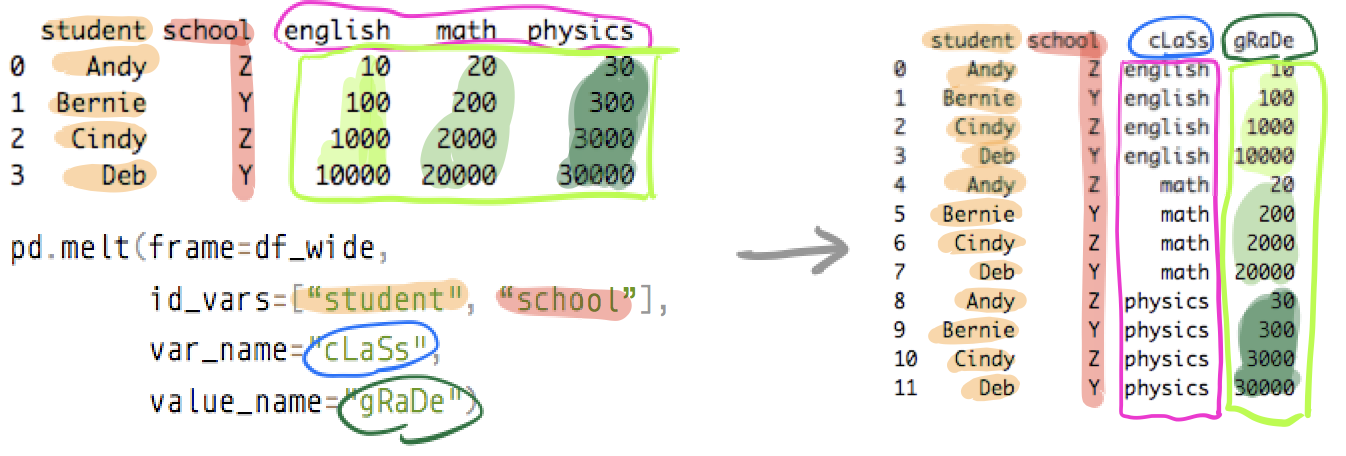

In [ ]:
df_wide.melt(id_vars=["student", "school"],
             var_name="cLaSs",  # rename
             value_name="gRaDe")  # rename

,student,school,cLaSs,gRaDe
0,Andy,Z,english,10
1,Bernie,Y,english,100
2,Cindy,Z,english,1000
3,Deb,Y,english,10000
4,Andy,Z,math,20
...,...,...,...,...
7,Deb,Y,math,20000
8,Andy,Z,physics,30
9,Bernie,Y,physics,300
10,Cindy,Z,physics,3000


In [ ]:
df_wide.melt(id_vars="student", 
             value_vars=["english", "math"], 
             var_name="cLaSs",  # rename
             value_name="gRaDe")  # rename

,student,cLaSs,gRaDe
0,Andy,english,10
1,Bernie,english,100
2,Cindy,english,1000
3,Deb,english,10000
4,Andy,math,20
5,Bernie,math,200
6,Cindy,math,2000
7,Deb,math,20000


In [ ]:
df_wide.melt(id_vars="student",
             var_name="cLaSs",  # rename
             value_name="gRaDe")  # rename

,student,cLaSs,gRaDe
0,Andy,school,Z
1,Bernie,school,Y
2,Cindy,school,Z
3,Deb,school,Y
4,Andy,english,10
5,Bernie,english,100
6,Cindy,english,1000
7,Deb,english,10000
8,Andy,math,20
9,Bernie,math,200


# Iterators and Generators

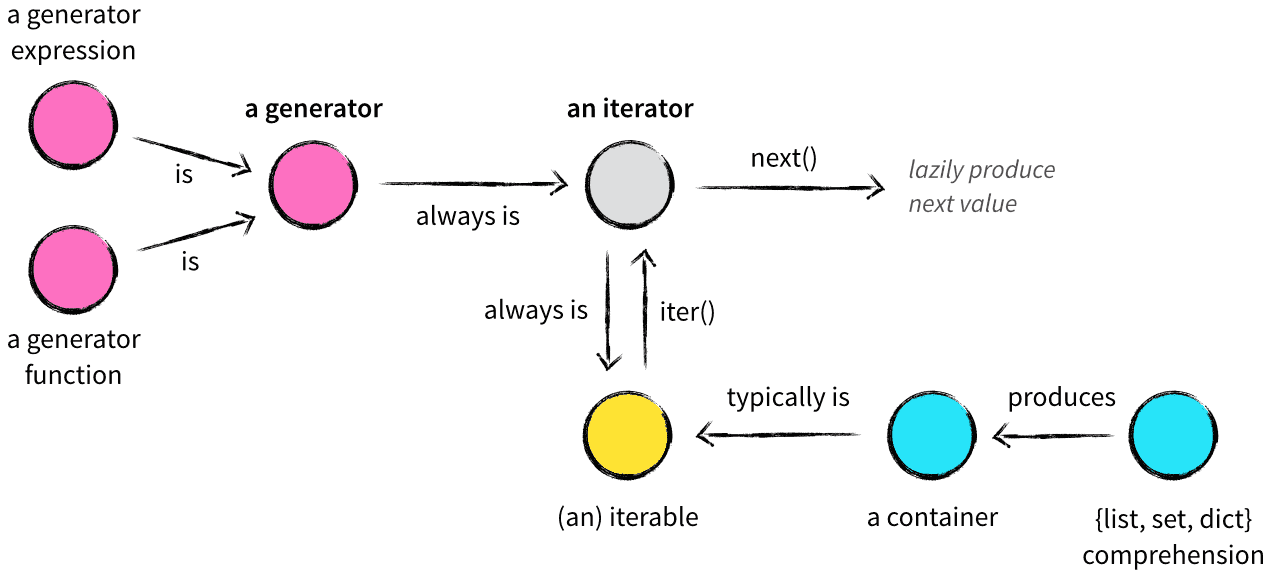

In [ ]:
https://nvie.com/posts/iterators-vs-generators/

In [ ]:
range(1,5,1)

range(1, 5)

In [ ]:
list(range(1,5,1))

[1, 2, 3, 4]

In [ ]:
for i in range(1,5,1):
  print(datalist[i])

6.9
4.2
5.6
1.1


In [ ]:
mylist = [1, 2, 3, 4, 5]

In [ ]:
mylist

[1, 2, 3, 4, 5]

In [ ]:
datalist = [ 4.5, 6.9, 4.2, 5.6, 1.1, 7.8 ]

In [ ]:
mylist[1]

2

In [ ]:
# iteration
for i in mylist:
  print(datalist[i])

6.9
4.2
5.6
1.1
7.8


In [ ]:
[x*2 for x in mylist] # list comprehension

[2, 4, 6]

In [ ]:
def something():
    result = []
    for x in range(1,5):
        result.append(datalist[x]*2)
    return result

In [ ]:
k = something()

In [ ]:
k

[13.8, 8.4, 11.2, 2.2]

In [ ]:
# Create a generator function instead of accumulating results
def iter_something():
    for x in range(1,5):
        yield datalist[x]*2

In [ ]:
j = iter_something()

In [ ]:
j

<generator object iter_something at 0x7f98b7e1a9d0>

In [ ]:
next(j)

StopIteration: ignored

In [ ]:
j

<generator object iter_something at 0x7f98b7e1a9d0>

In [ ]:
for w in j:
  print(w)

13.8
8.4
11.2
2.2
